## TWITTER SENTIMENT ANALYSIS LSTM

#### IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#### Loading and Analysing the Dataset

In [2]:
df=pd.read_csv('Twitter_Data.csv')
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [3]:
df['clean_text'].loc[0]

'when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples'

In [4]:
df.shape

(162980, 2)

In [5]:
df['category'].value_counts()

category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64

In [6]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [9]:
df=df.reset_index()

In [10]:
df.head()

,index,clean_text,category
0,0,when modi promised “minimum government maximum...,-1.0
1,1,talk all the nonsense and continue all the dra...,0.0
2,2,what did just say vote for modi welcome bjp t...,1.0
3,3,asking his supporters prefix chowkidar their n...,1.0
4,4,answer who among these the most powerful world...,1.0


#### Text Preprocessing

In [11]:
ps=PorterStemmer()
corpus = []
for i in range(0, len(df)):
    tweets = re.sub('[^a-zA-Z]', ' ', df['clean_text'][i])
    tweets = tweets.lower()
    tweets = tweets.split()
    tweets = [ps.stem(word) for word in tweets if not word in stopwords.words('english')]
    tweets = ' '.join(tweets)
    corpus.append(tweets)

In [12]:
df['clean_text'].loc[2]

'what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax'

In [13]:
corpus[2]

'say vote modi welcom bjp told rahul main campaign modi think modi relax'

#### BUILDING THE MODEL

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

In [15]:
voc_size=5000

In [16]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[658,
  1814,
  1291,
  4481,
  862,
  4481,
  2159,
  617,
  559,
  393,
  4749,
  861,
  3216,
  666,
  3270,
  3135,
  861,
  3957,
  2960,
  3749,
  1703],
 [2147, 4597, 2995, 3176, 960, 658],
 [192, 960, 658, 4845, 4747, 4107, 1578, 1552, 1855, 658, 1170, 658, 91],
 [2512,
  4569,
  1183,
  1770,
  2963,
  658,
  1302,
  4658,
  2919,
  16,
  4086,
  1380,
  651,
  485,
  4597,
  870,
  912,
  3616,
  1770],
 [3367, 427, 841, 826, 240, 2677, 4211, 1282, 658, 2855],
 [829, 2272, 197, 1524, 2226, 4286],
 [2955, 1018, 4949, 2076, 918, 3815, 4874, 2936, 658, 2136],
 [3616, 1335, 4078, 3247, 658, 323, 1707, 2556, 2709],
 [1392,
  3933,
  629,
  4231,
  2900,
  3874,
  4771,
  2250,
  4330,
  658,
  4284,
  220,
  3933,
  2254,
  3770,
  3016,
  11,
  2250,
  935,
  1183,
  4902],
 [2981, 3710, 658],
 [1768,
  3247,
  369,
  875,
  4176,
  4658,
  4011,
  345,
  2255,
  1498,
  4903,
  3953,
  3829,
  313,
  192,
  861,
  2765,
  2556,
  2255,
  3247,
  2794,
  893,
  658,
  1412],
 [3

In [17]:
sent_length=50
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

[[ 658 1814 1291 ...    0    0    0]
 [2147 4597 2995 ...    0    0    0]
 [ 192  960  658 ...    0    0    0]
 ...
 [4200 2171 3234 ...    0    0    0]
 [ 140 1111 2354 ...    0    0    0]
 [3597 4655 3247 ...    0    0    0]]


In [25]:
# Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))

In [26]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 50, 40)              │         200,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 50, 40)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100)                 │          56,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 770,111 (2.94 MB)

 Trainable params: 256,703 (1002.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 513,408 (1.96 MB)

In [28]:
X=embedded_docs
y=pd.get_dummies(df['category'])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [30]:
model.fit(X_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
2038/2038 ━━━━━━━━━━━━━━━━━━━━ 96s 44ms/step - accuracy: 0.5791 - loss: 0.8991
Epoch 2/10
2038/2038 ━━━━━━━━━━━━━━━━━━━━ 90s 44ms/step - accuracy: 0.7503 - loss: 0.6391
Epoch 3/10
2038/2038 ━━━━━━━━━━━━━━━━━━━━ 87s 43ms/step - accuracy: 0.7792 - loss: 0.5643
Epoch 4/10
2038/2038 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.7905 - loss: 0.5364
Epoch 5/10
2038/2038 ━━━━━━━━━━━━━━━━━━━━ 91s 45ms/step - accuracy: 0.7972 - loss: 0.5166
Epoch 6/10
2038/2038 ━━━━━━━━━━━━━━━━━━━━ 92s 45ms/step - accuracy: 0.8056 - loss: 0.4986
Epoch 7/10
2038/2038 ━━━━━━━━━━━━━━━━━━━━ 92s 45ms/step - accuracy: 0.8122 - loss: 0.4837
Epoch 8/10
2038/2038 ━━━━━━━━━━━━━━━━━━━━ 91s 45ms/step - accuracy: 0.8166 - loss: 0.4674
Epoch 9/10
2038/2038 ━━━━━━━━━━━━━━━━━━━━ 95s 46ms/step - accuracy: 0.8250 - loss: 0.4533
Epoch 10/10
2038/2038 ━━━━━━━━━━━━━━━━━━━━ 91s 45ms/step - accuracy: 0.8299 - loss: 0.4407


In [37]:
model.evaluate(X_test,y_test)

1019/1019 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.7844 - loss: 0.5539


[0.5647766590118408, 0.7830889225006104]

In [38]:
y_test_arg=np.argmax(y_test,axis=1)
y_pred = np.argmax(model.predict(X_test),axis=1)

1019/1019 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step


In [39]:
confusion_matrix(y_test_arg,y_pred)

array([[ 5279,   875,  1024],
       [ 1032,  8888,  1108],
       [ 1532,  1499, 11357]], dtype=int64)

Text(70.72222222222221, 0.5, 'Predicted label')

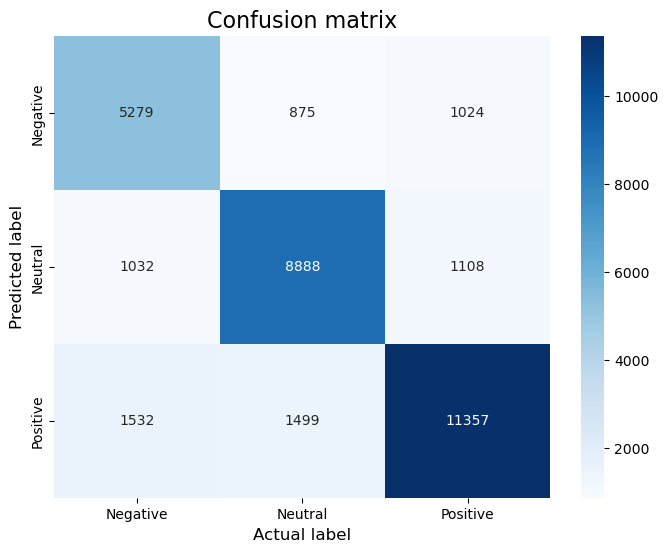

In [40]:
sentiment_classes = ['Negative', 'Neutral', 'Positive']
cm = confusion_matrix(y_test_arg,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', xticklabels=sentiment_classes,yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)   

In [41]:
print(classification_report(y_test_arg,y_pred,target_names=sentiment_classes))

              precision    recall  f1-score   support

    Negative       0.67      0.74      0.70      7178
     Neutral       0.79      0.81      0.80     11028
    Positive       0.84      0.79      0.81     14388

    accuracy                           0.78     32594
   macro avg       0.77      0.78      0.77     32594
weighted avg       0.79      0.78      0.78     32594



In [44]:
corpus[0]

'modi promis minimum govern maximum govern expect begin difficult job reform state take year get justic state busi exit psu templ'

In [45]:
X_test[0]

array([ 534, 4766,  839, 3216,  658, 2767, 1176, 3315, 1375,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

In [50]:
corpus[678]

'think modi repres hindu sorri der differ normal hindu chutia hindusbhajpaisanghi'

In [48]:
y_test_arg[678]

2

In [49]:
y_pred[678]

2

In [58]:
y_pred

array([1, 1, 1, ..., 2, 2, 0], dtype=int64)

In [59]:
y_test_arg

array([1, 1, 1, ..., 2, 2, 0], dtype=int64)